In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
data_train = pd.read_csv(r'C:\Users\User\Desktop\Для задач\Kaggle\Соревнование Титаник\Исходное\train.csv')
data_test = pd.read_csv(r'C:\Users\User\Desktop\Для задач\Kaggle\Соревнование Титаник\Исходное\test.csv')
data_all = pd.concat([data_train, data_test]).reset_index(drop=True)

## Описание колонок
'PassengerId': 'Номер_пассажира',      
'Survived': 'Выжил',      
'Pclass': 'класс_билета',      
'Sex': 'Пол', 
'Age': 'Возраст',      
'SibSp': 'Братьев_сестер',      
'Parch': 'Родителей_детей',      
'Fare': 'Тариф', 
'Cabin': 'Номер_каюты',      
'Embarked': 'Порт_погрузки',      
'Ticket': 'Номер_билета',       
'Name': 'Имя'

In [3]:
print(f'В тренировочном наборе |   строк: {data_train.shape[0]}; столбцов: {data_train.shape[1]}')
print(f'В тестовом наборе      |   строк: {data_test.shape[0]}; столбцов: {data_test.shape[1]}')
print(f'В полном наборе        |   строк: {data_all.shape[0]}; столбцов: {data_all.shape[1]}')

В тренировочном наборе |   строк: 891; столбцов: 12
В тестовом наборе      |   строк: 418; столбцов: 11
В полном наборе        |   строк: 1309; столбцов: 12


In [4]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
data_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


## 1. Смотрим на данные

In [8]:
# проверим количество пустых значений
data_nan = pd.DataFrame(data_all.isnull().sum(), columns=['Пустоты']).sort_values(by='Пустоты', ascending=False)
data_nan = data_nan[(data_nan['Пустоты'] != 0) & (data_nan.index != 'Survived')]
data_nan

,Пустоты
Cabin,1014
Age,263
Embarked,2
Fare,1


In [9]:
numeric_feature = []
ordinal_feature = []

for col in data_all.columns:
    if data_all[col].nunique() >= 10:
        numeric_feature.append(col)
    else:
        ordinal_feature.append(col)
print(f'Список количесвтенных переменных - {numeric_feature}')
print(f'Список порядкорвых переменных - {ordinal_feature}')

# Интуитивно мы можем поправить эти списки

Список количесвтенных переменных - ['PassengerId', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin']
Список порядкорвых переменных - ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']


In [10]:
numeric_feature = ['Age', 'Fare']
categorical_feature = ['Ticket', 'Cabin']
ordinal_feature = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

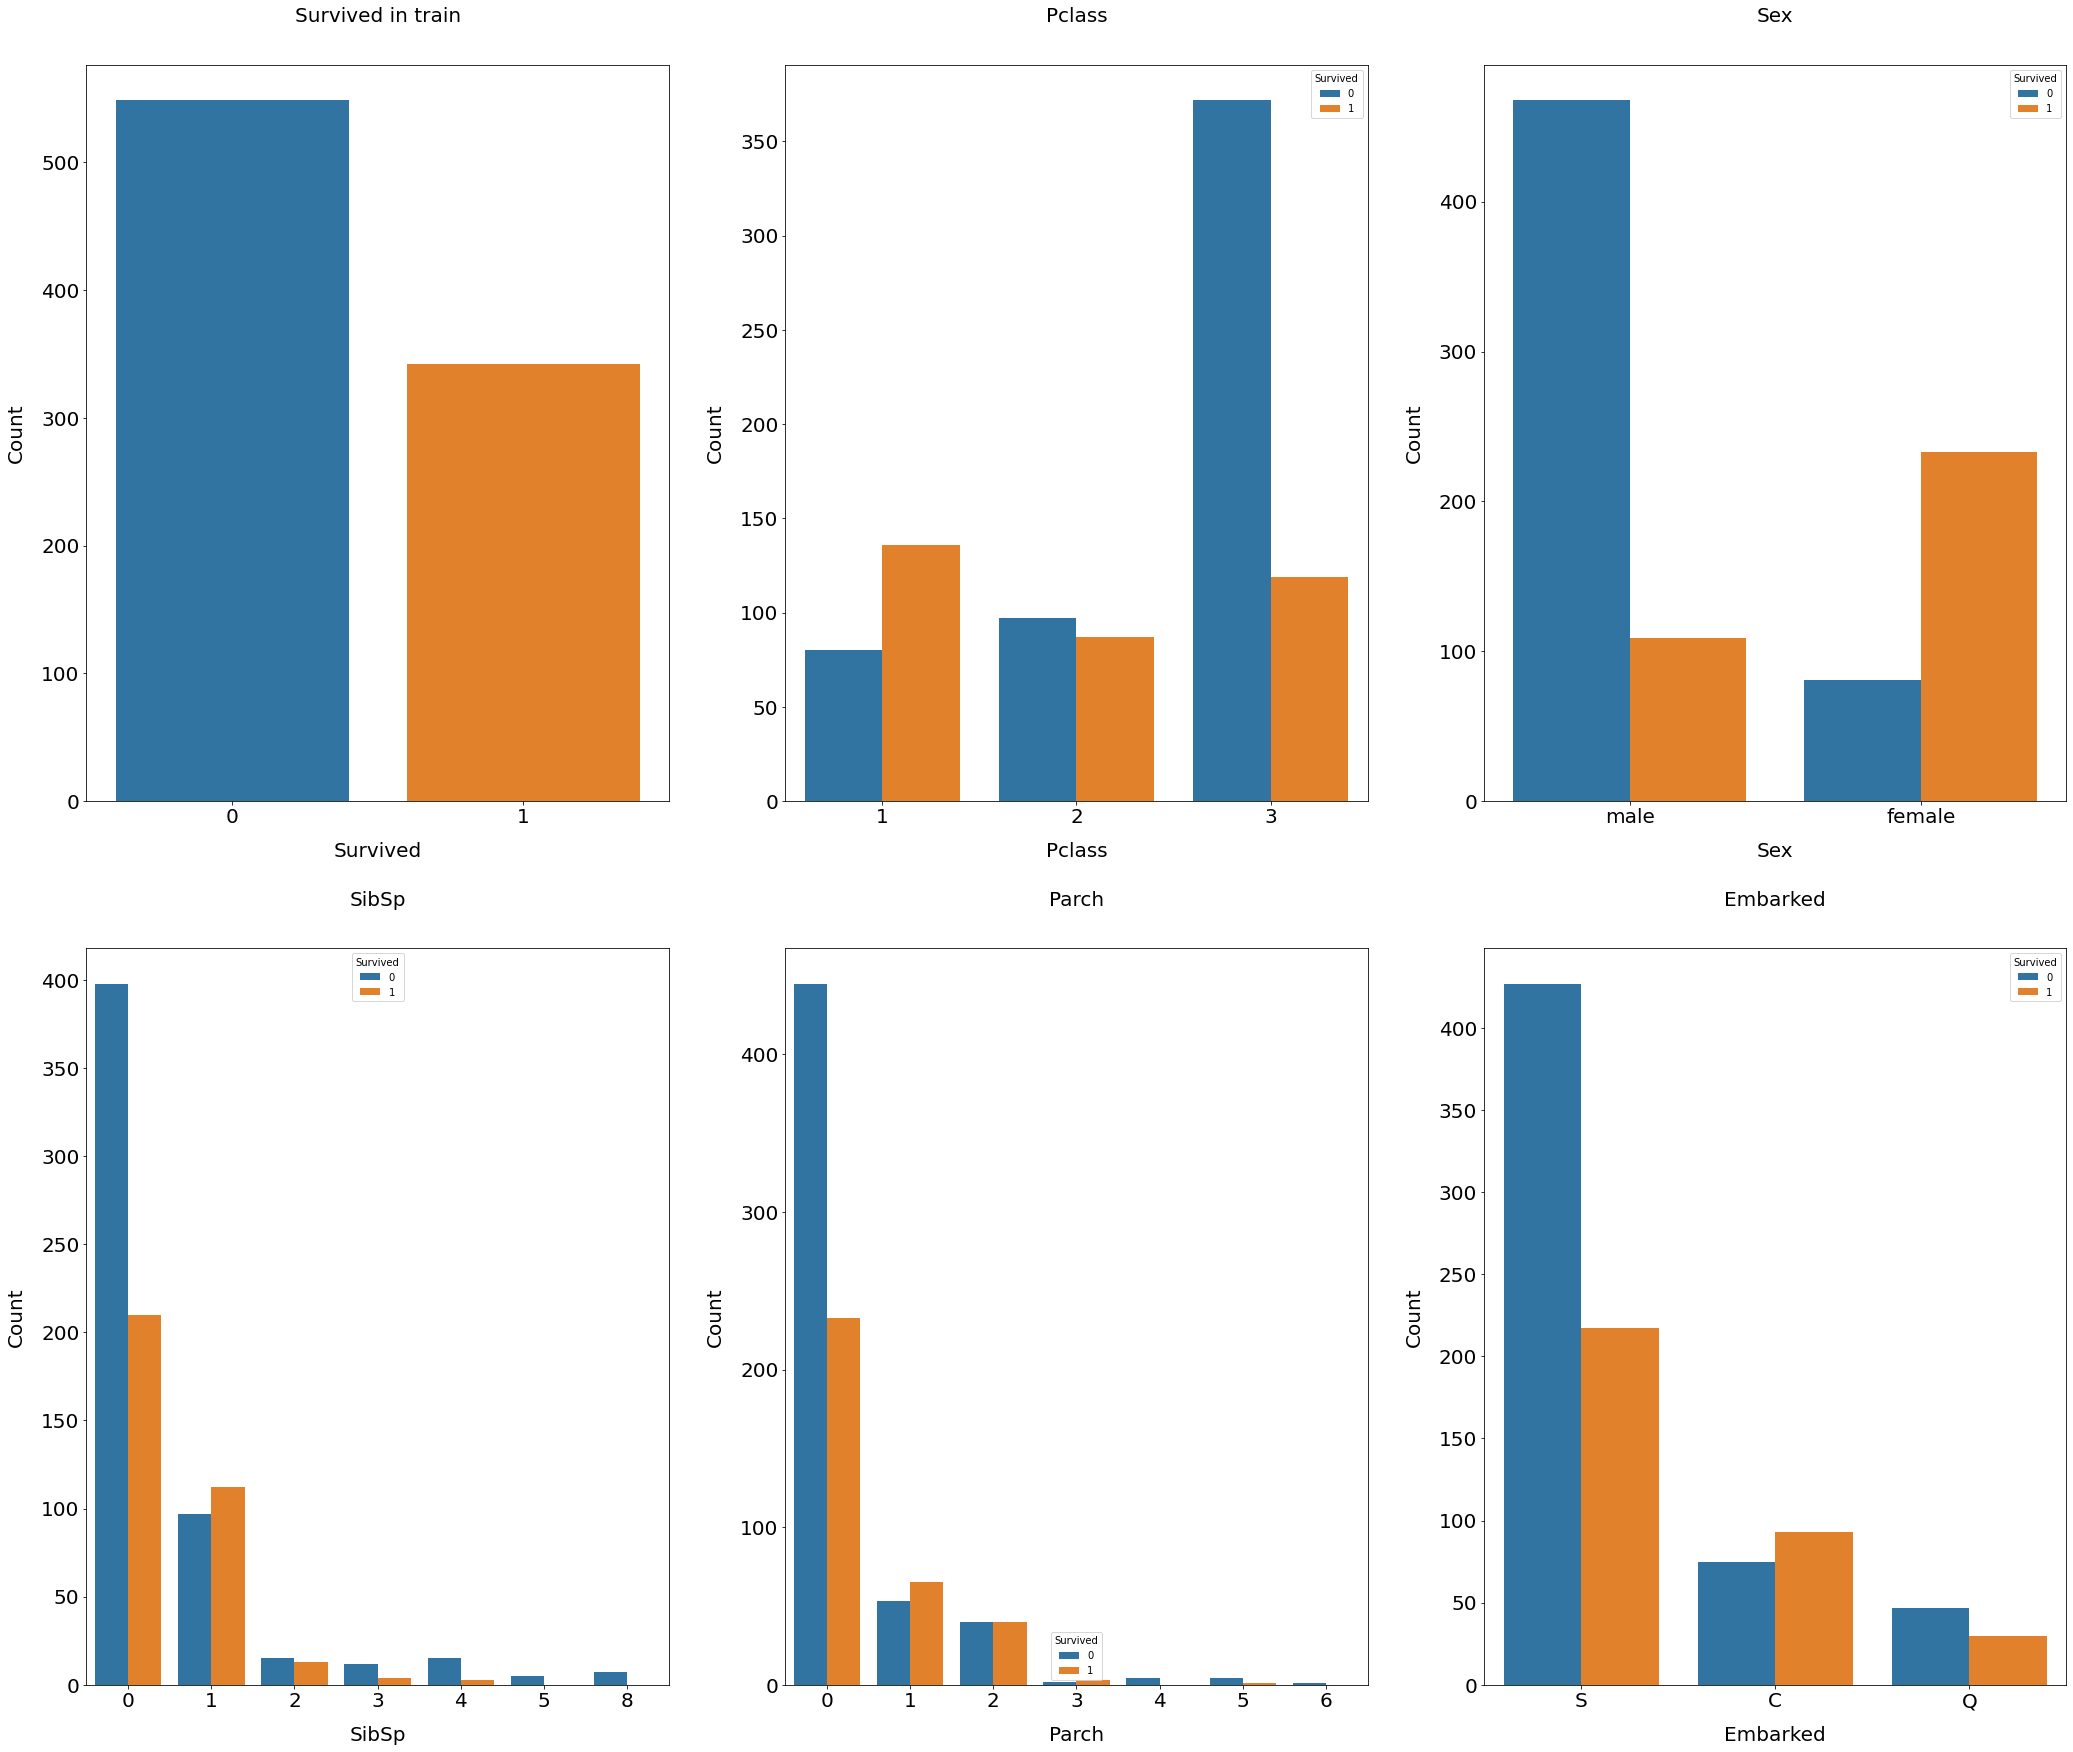

In [11]:
# График категориальных признаков для тернировочного набора данных (на трейне можно поделить на выживших и нет)

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(ordinal_feature):
    plt.subplot(2, 3, i+1)
    
    if feature == 'Survived':
        sns.countplot(x=data_train[feature], data=data_train)
        plt.title('Survived in train', size=20, y=1.05)
    else:
        sns.countplot(x=data_train[feature], hue='Survived', data=data_train)
        plt.title(feature, size=20, y=1.05)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)

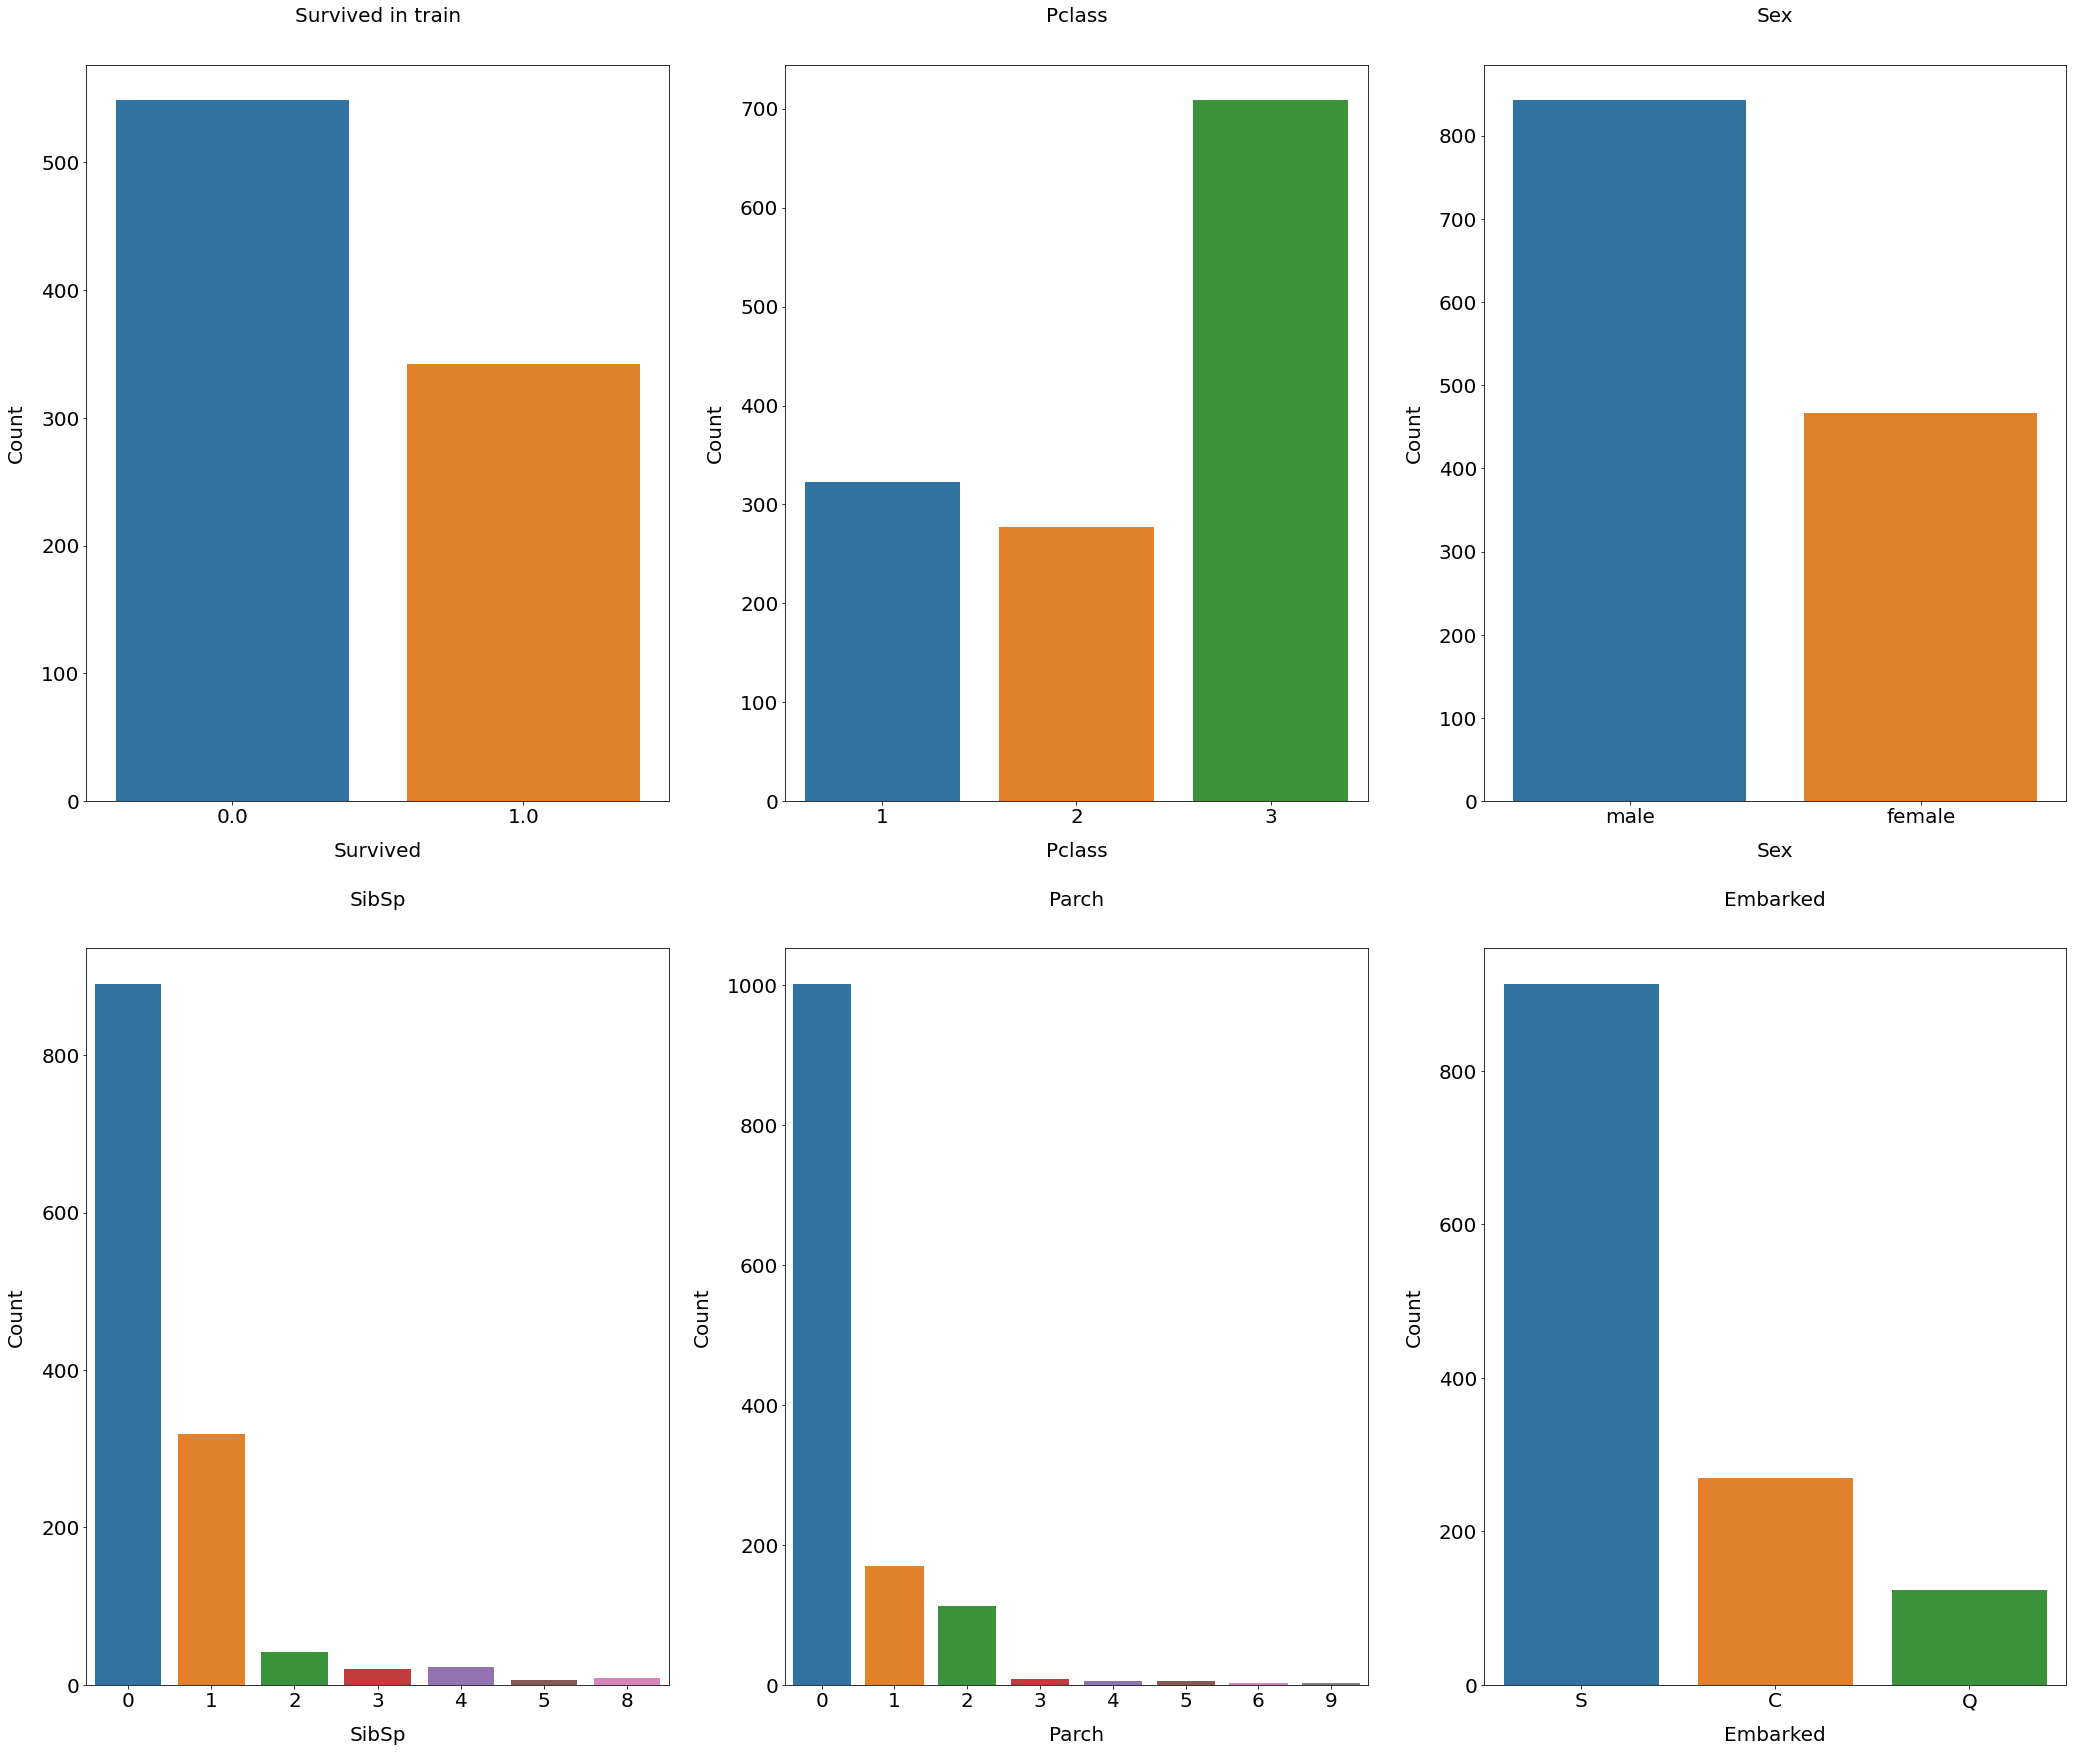

In [12]:
# График категориальных признаков для полного набора данных

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(ordinal_feature):
    plt.subplot(2, 3, i+1)
    
    if feature == 'Survived':
        sns.countplot(x=data_all[feature], data=data_all)
        plt.title('Survived in train', size=20, y=1.05)
    else:
        sns.countplot(x=data_all[feature], data=data_all)
        plt.title(feature, size=20, y=1.05)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)

In [13]:
# По категориям можно утверждать:
# 1. Заполнять ли кабины, и чем заполнить остальное
# 2. В тренировочном наборе погибших больше, чем выжившх - надо будет перемешать пропорционально
# 3. 1 класс - выживает хорошо, 2 - средне, 3 - очень плохо
# 4. женщины выживают лучше мужчин
# 5. два столбца по сути содержат одну информацию их лучше рассматривать вместе
# 6. Порт погрузки как-будто бы влияет на выживаемость, но интуитивно это не очень объяснимо

## 2. Заполняем пустоты

### 2.1 Кабины - как итог заменить столбец 0 - признаком отсутствия данных, 1 - выживающие палубы, 2 - плохо-выживающие 

In [14]:
data_for_dif_Cabin = data_train.copy()
data_for_dif_Cabin['Deck'] = data_for_dif_Cabin['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'Нет_данных')

In [15]:
data_for_dif_Cabin.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Нет_данных
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Нет_данных
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Нет_данных


<AxesSubplot:xlabel='Deck', ylabel='count'>

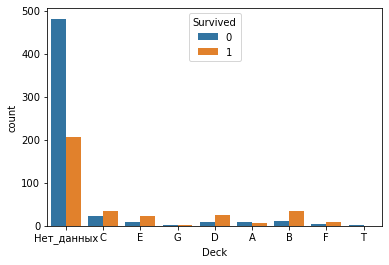

In [16]:
# Видим, что в тренировочном наборе люди, для которых кабина известна выживают чаще, тогда добавим признак наличия данных
sns.countplot(x=data_for_dif_Cabin.Deck, hue=data_for_dif_Cabin.Survived, data=data_for_dif_Cabin)

In [17]:
data_for_dif_Cabin['Deck'] = data_for_dif_Cabin['Deck'].map({'Нет_данных': 0,
                                         'C': 1,
                                         'E': 1,
                                         'D': 1,
                                         'B': 1,
                                         'F': 1,
                                         'G': 2,
                                         'A': 2,
                                         'T': 2})

<AxesSubplot:xlabel='Deck', ylabel='count'>

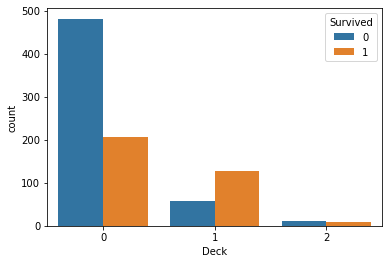

In [18]:
sns.countplot(x=data_for_dif_Cabin.Deck, hue=data_for_dif_Cabin.Survived, data=data_for_dif_Cabin)

In [19]:
data_for_dif_Cabin.Deck.value_counts()

0    687
1    184
2     20
Name: Deck, dtype: int64

### 2.2 Возраст - как итог заполняем медианой по классу

Text(0.5, 1.0, 'Распределение возраста в тестовом наборе')

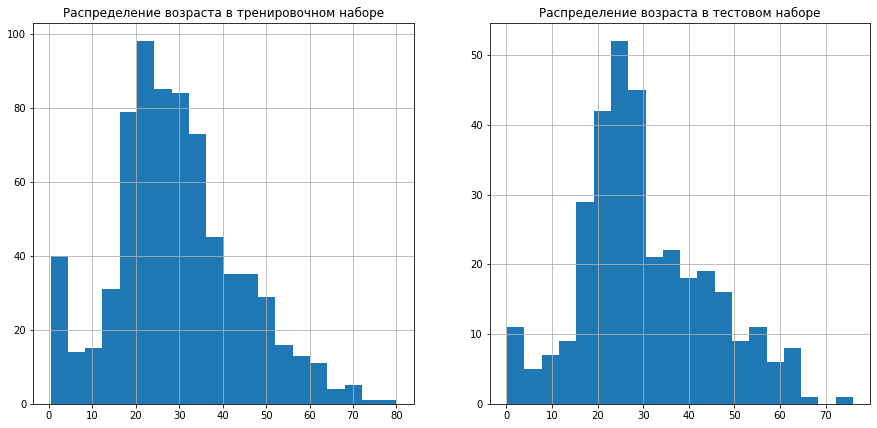

In [20]:
fig, axs = plt.subplots(figsize=(15, 7))

plt.subplot(1, 2, 1)
data_train.Age.hist(bins=20)
plt.title('Распределение возраста в тренировочном наборе')

plt.subplot(1, 2, 2)
data_test.Age.hist(bins=20)
plt.title('Распределение возраста в тестовом наборе')


Text(0.5, 1.0, 'Расп-е возраста в третьем классе - test')

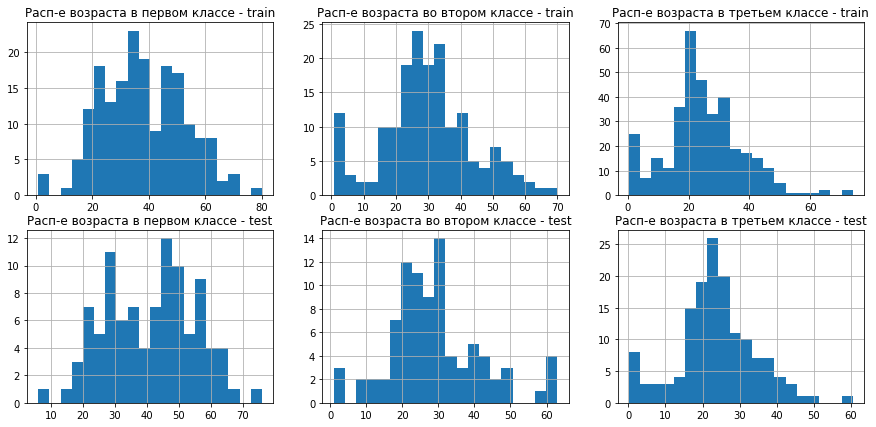

In [21]:
# Можно сказать, что распределение возраста примерно одинаковое по классам для трейна и теста
fig, axs = plt.subplots(figsize=(15, 7))

plt.subplot(2, 3, 1)
data_train[data_train['Pclass'] == 1].Age.hist(bins=20)
plt.title('Расп-е возраста в первом классе - train')

plt.subplot(2, 3, 2)
data_train[data_train['Pclass'] == 2].Age.hist(bins=20)
plt.title('Расп-е возраста во втором классе - train')

plt.subplot(2, 3, 3)
data_train[data_train['Pclass'] == 3].Age.hist(bins=20)
plt.title('Расп-е возраста в третьем классе - train')

plt.subplot(2, 3, 4)
data_test[data_test['Pclass'] == 1].Age.hist(bins=20)
plt.title('Расп-е возраста в первом классе - test')

plt.subplot(2, 3, 5)
data_test[data_test['Pclass'] == 2].Age.hist(bins=20)
plt.title('Расп-е возраста во втором классе - test')

plt.subplot(2, 3, 6)
data_test[data_test['Pclass'] == 3].Age.hist(bins=20)
plt.title('Расп-е возраста в третьем классе - test')

### 2.3 Тариф - как итог заполнить медианой по классу

Text(0.5, 1.0, 'Расп-е тарифа в третьем классе - test')

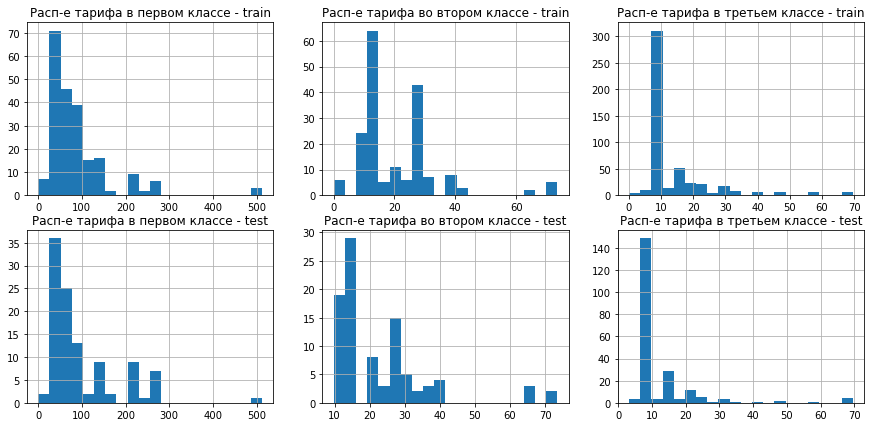

In [22]:
fig, axs = plt.subplots(figsize=(15, 7))

plt.subplot(2, 3, 1)
data_train[data_train['Pclass'] == 1].Fare.hist(bins=20)
plt.title('Расп-е тарифа в первом классе - train')

plt.subplot(2, 3, 2)
data_train[data_train['Pclass'] == 2].Fare.hist(bins=20)
plt.title('Расп-е тарифа во втором классе - train')

plt.subplot(2, 3, 3)
data_train[data_train['Pclass'] == 3].Fare.hist(bins=20)
plt.title('Расп-е тарифа в третьем классе - train')

plt.subplot(2, 3, 4)
data_test[data_test['Pclass'] == 1].Fare.hist(bins=20)
plt.title('Расп-е тарифа в первом классе - test')

plt.subplot(2, 3, 5)
data_test[data_test['Pclass'] == 2].Fare.hist(bins=20)
plt.title('Расп-е тарифа во втором классе - test')

plt.subplot(2, 3, 6)
data_test[data_test['Pclass'] == 3].Fare.hist(bins=20)
plt.title('Расп-е тарифа в третьем классе - test')

In [23]:
data_train.groupby('Pclass')[['Age', 'Fare']].median()

,Age,Fare
Pclass,,
1,37.0,60.2875
2,29.0,14.2500
3,24.0,8.0500


### 2.4 Порт погрузки - как итог заменить модой

In [24]:
data_all.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

### 2.5 Члены семьи - как итог сложить два столбца и поделить на группы

In [25]:
data_train_family = data_train.copy()

<AxesSubplot:xlabel='SibSp', ylabel='count'>

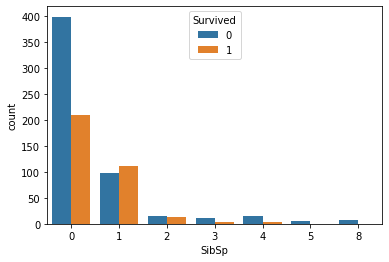

In [26]:
# выживание в зависимости от количества братьев и сестер
sns.countplot(x=data_train_family['SibSp'], hue=data_train_family['Survived'], data=data_train_family)

<AxesSubplot:xlabel='Parch', ylabel='count'>

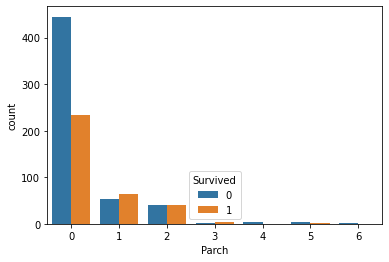

In [27]:
# выживание в зависимости от количества родителей и детей
sns.countplot(x=data_train_family['Parch'], hue=data_train_family['Survived'], data=data_train_family)

In [28]:
data_train_family['Family_size'] = data_train_family['Parch'] + data_train_family['SibSp']

<AxesSubplot:xlabel='Family_size', ylabel='count'>

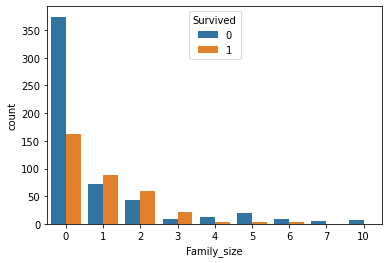

In [29]:
sns.countplot(x=data_train_family['Family_size'], hue=data_train['Survived'], data=data_train)

In [30]:
data_train_family['Family_size'] = np.where(data_train_family['Family_size'] == 0, 0,
                                             np.where(data_train_family['Family_size'] <= 3, 1,
                                                      np.where(data_train_family['Family_size'] <= 6, 2, 3)))

In [31]:
data_train_family['Family_size'].value_counts()

0    537
1    292
2     49
3     13
Name: Family_size, dtype: int64

<AxesSubplot:xlabel='Family_size', ylabel='count'>

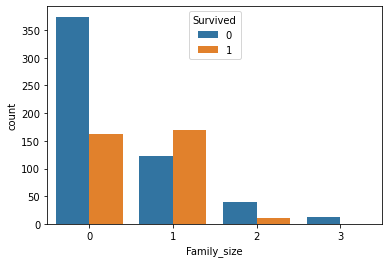

In [32]:
sns.countplot(x=data_train_family['Family_size'], hue=data_train['Survived'], data=data_train)

### 2.6 Столбец имя - не несет информации. Билет - разобьем на группы по количеству пассажиров, едущих по билету.

In [33]:
# Явно можно найти билеты, по которым едет много народу, но они не родственники
data_train_family[(data_train_family['Family_size'] == 0) & (data_train_family['Ticket'] == '1601')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,0
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S,0
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S,0
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S,0
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,0
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S,0
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S,0


In [34]:
# надо получить столбец с количеством которое билет встречается в выборке

ticket_counts = pd.DataFrame(data_train_family['Ticket'].value_counts()).rename(columns={'Ticket': 'Ticket_count'})
ticket_counts['Ticket'] = ticket_counts.index
ticket_counts

,Ticket_count,Ticket
1601,7,1601
347082,7,347082
CA. 2343,7,CA. 2343
347088,6,347088
3101295,6,3101295
...,...,...
349222,1,349222
370372,1,370372
347060,1,347060
244358,1,244358


In [35]:
data_train_family_ticket = data_train_family.merge(ticket_counts, on='Ticket')
data_train_family_ticket

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Ticket_count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2
4,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,0,1
887,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1
888,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1


<AxesSubplot:xlabel='Ticket_count', ylabel='count'>

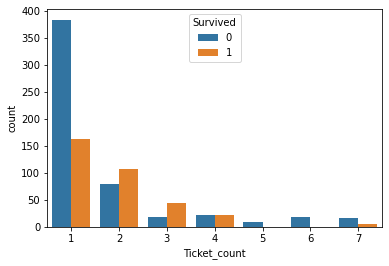

In [36]:
sns.countplot(x=data_train_family_ticket['Ticket_count'], 
              hue=data_train_family_ticket['Survived'], 
              data=data_train_family_ticket)

In [37]:
data_train_family_ticket['Ticket_count'] = np.where(data_train_family_ticket['Ticket_count'] == 1, 1,
                                             np.where(data_train_family_ticket['Ticket_count'] <= 4, 2, 3))   

<AxesSubplot:xlabel='Ticket_count', ylabel='count'>

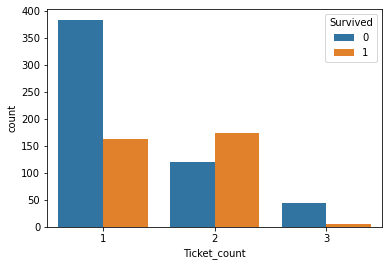

In [38]:
sns.countplot(x=data_train_family_ticket['Ticket_count'], 
              hue=data_train_family_ticket['Survived'], 
              data=data_train_family_ticket)

In [39]:
data_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Функиця Предобработки фрейма данных

In [40]:
train = data_train.copy().drop('PassengerId', axis=1)
test = data_test.copy().drop('PassengerId', axis=1)

In [41]:
data_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
def preprocessing_data(data):
    '''
    На вход получает исходное полное множество
    На выход дает полное множество для разделения на трейн и тест выборки
    '''
    # Заполняем пропуски в колонке 'кабина'
    
    data['Deck'] = data['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'Нет_данных')
    data['Deck'] = data['Deck'].map({'Нет_данных': 0,
                                         'C': 1,
                                         'E': 2,
                                         'D': 2,
                                         'B': 1,
                                         'F': 3,
                                         'G': 3,
                                         'A': 1,
                                         'T': 1})
    
    # возраст по классам
    
    replace_values = data.groupby('Pclass').median()['Age']
    data.loc[(data['Age'].isnull() == 1) & (data['Pclass'] == 1), 'Age'] = replace_values[1]               
    data.loc[(data['Age'].isnull() == 1) & (data['Pclass'] == 2), 'Age'] = replace_values[2]                
    data.loc[(data['Age'].isnull() == 1) & (data['Pclass'] == 3), 'Age'] = replace_values[3] 
    
    # тариф по классам
    
    replace_values_1 = data.groupby('Pclass').median()['Fare']
    data.loc[(data['Fare'].isnull() == 1) & (data['Pclass'] == 1), 'Fare'] = replace_values_1[1]               
    data.loc[(data['Fare'].isnull() == 1) & (data['Pclass'] == 2), 'Fare'] = replace_values_1[2]                
    data.loc[(data['Fare'].isnull() == 1) & (data['Pclass'] == 3), 'Fare'] = replace_values_1[3] 
    
    # Порт погрузки вставляем моду
    
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
    
    # Члены семьи
    
    data['Family_size'] = data['Parch'] + data['SibSp'] + 1
    
    data['Family_size'] = np.where(data['Family_size'] == 1, 1,
                                             np.where(data['Family_size'] <= 4, 2,
                                                      np.where(data['Family_size'] <= 6, 3, 4)))
    
    # Билеты по количеству
    Tickets = list(data['Ticket'])
    Count_Tickets = [Tickets.count(i) for i in Tickets]
    data['Ticket_count'] = Count_Tickets
    data['Ticket_count'] = np.where(data['Ticket_count'] == 1, 1,
                                    np.where(data['Ticket_count'] <= 4, 2, 3))
    
    # Перекодируем значения категориальных признаков
    
    data['Sex'] = np.where(data['Sex'] == 'male', 1, 0)
    
    # удаляем лишние столбцы
    data = data.drop(['PassengerId', 'SibSp', 'Parch', 'Name', 'Ticket', 'Cabin', 'Ticket_count', 'Deck'], axis=1)
    
    # разделяем групповые признаки
    data = pd.get_dummies(data, columns = ['Embarked', 'Family_size'])

#    data = pd.get_dummies(data, columns = ['Embarked', 'Pclass', 'Family_size', 'Ticket_count'])
    
    std_scaler = StandardScaler()
    data.loc[:, ['Age', 'Fare']] = std_scaler.fit_transform(data[['Age', 'Fare']])
    
    return data

### Разделим на обучающую и тестовую выборку

In [43]:
data_all_clear = preprocessing_data(data_all)
X_train = data_all_clear.loc[:890].drop('Survived', axis=1)
y_train = data_all_clear.loc[:890]['Survived']

In [44]:
data_all_clear

,Survived,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Family_size_1,Family_size_2,Family_size_3,Family_size_4
0,0.0,3,1,-0.547380,-0.503176,0,0,1,0,1,0,0
1,1.0,1,0,0.667747,0.734809,1,0,0,0,1,0,0
2,1.0,3,0,-0.243598,-0.490126,0,0,1,1,0,0,0
3,1.0,1,0,0.439911,0.383263,0,0,1,0,1,0,0
4,0.0,3,1,0.439911,-0.487709,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1,-0.395489,-0.487709,0,0,1,1,0,0,0
1305,NaN,1,0,0.743693,1.462069,1,0,0,1,0,0,0
1306,NaN,3,1,0.705720,-0.503176,0,0,1,1,0,0,0
1307,NaN,3,1,-0.395489,-0.487709,0,0,1,1,0,0,0


In [45]:
X_test = data_all_clear.loc[891:].drop('Survived', axis=1)

In [46]:
print(f'Размер обучающей выборки - {X_train.shape}')
print(f'Размер тестовой выборки - {X_test.shape}')

Размер обучающей выборки - (891, 11)
Размер тестовой выборки - (418, 11)


## 4. Подбор функции для обучения. Кросс-валидация.

In [47]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Family_size_1,Family_size_2,Family_size_3,Family_size_4
0,3,1,-0.547380,-0.503176,0,0,1,0,1,0,0
1,1,0,0.667747,0.734809,1,0,0,0,1,0,0
2,3,0,-0.243598,-0.490126,0,0,1,1,0,0,0
3,1,0,0.439911,0.383263,0,0,1,0,1,0,0
4,3,1,0.439911,-0.487709,0,0,1,1,0,0,0


In [48]:
X_test.head()

,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Family_size_1,Family_size_2,Family_size_3,Family_size_4
891,3,1,0.401938,-0.491978,0,1,0,1,0,0,0
892,3,0,1.351256,-0.508010,0,0,1,0,1,0,0
893,2,1,2.490437,-0.456051,0,1,0,1,0,0,0
894,3,1,-0.167653,-0.475868,0,0,1,1,0,0,0
895,3,0,-0.547380,-0.405784,0,0,1,0,1,0,0


In [49]:
# создадим перемешиватель для валидаций
skf = StratifiedKFold(n_splits = 5, shuffle=True, random_state=0)

### 4.1 Обычное дерево решений

In [50]:
tree = DecisionTreeClassifier().fit(X_train, y_train)

In [51]:
print(f'Обычный score на трейн множестве - {accuracy_score(y_train, tree.predict(X_train))}')
print(f'Кросс-валидационный score на трейн множестве - {cross_val_score(tree, X_train, y_train, cv=skf).mean()}')

Обычный score на трейн множестве - 0.9820426487093153
Кросс-валидационный score на трейн множестве - 0.7878664239532986


In [52]:
max_depth_var = range(1, 50)
tree_score = []
tree_cv_score = []

for m_d in max_depth_var:
    tree = DecisionTreeClassifier(max_depth=m_d).fit(X_train, y_train)
    tree_score.append(accuracy_score(y_train, tree.predict(X_train)))
    tree_cv_score.append(cross_val_score(tree, X_train, y_train, cv=skf).mean())

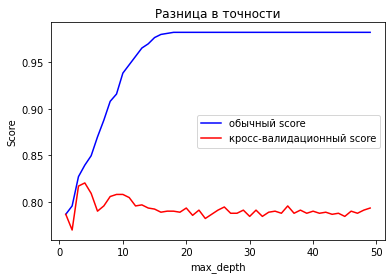

In [53]:
plt.plot(max_depth_var, tree_score, c='blue', label='обычный score')
plt.plot(max_depth_var, tree_cv_score, c='red', label='кросс-валидационный score')
plt.title('Разница в точности')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.legend()

In [54]:
tree_max = pd.DataFrame({'max_depth': max_depth_var, 'score': tree_score, 
              'cross_val_score': tree_cv_score})['cross_val_score'].max()

### 4.2 K-NN, k-ближайших соседей

In [55]:
k_nn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

In [56]:
print(f'Обычный score на трейн множестве - {accuracy_score(y_train, k_nn.predict(X_train))}')
print(f'Кросс-валидационный score на трейн множестве - {cross_val_score(k_nn, X_train, y_train, cv=skf).mean()}')

Обычный score на трейн множестве - 0.8619528619528619
Кросс-валидационный score на трейн множестве - 0.8080534806352395


In [57]:
n_neighbors_var = range(1, 50)
k_nn_score = []
k_nn_cv_score = []

for n_nb in n_neighbors_var:
    k_nn = KNeighborsClassifier(n_neighbors=n_nb).fit(X_train, y_train)
    k_nn_score.append(accuracy_score(y_train, k_nn.predict(X_train)))
    k_nn_cv_score.append(cross_val_score(k_nn, X_train, y_train, cv=skf).mean())

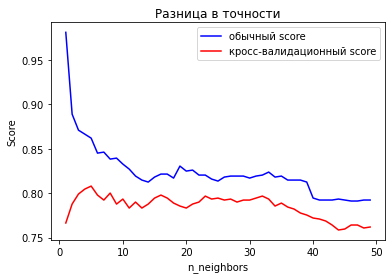

In [58]:
plt.plot(n_neighbors_var, k_nn_score, c='blue', label='обычный score')
plt.plot(n_neighbors_var, k_nn_cv_score, c='red', label='кросс-валидационный score')
plt.title('Разница в точности')
plt.xlabel('n_neighbors')
plt.ylabel('Score')
plt.legend()

In [59]:
knn_max = pd.DataFrame({'n_neighbors': n_neighbors_var, 'score': k_nn_score, 
              'cross_val_score': k_nn_cv_score})['cross_val_score'].max()

### 4.3 Логистическая регрессия

In [60]:
logit = LogisticRegression(C=1, random_state=0)
logit.fit(X_train, y_train)

LogisticRegression(C=1, random_state=0)

In [61]:
print(f'Обычный score на трейн множестве - {accuracy_score(y_train, logit.predict(X_train))}')
print(f'Кросс-валидационный score на трейн множестве - {cross_val_score(logit, X_train, y_train, cv=skf).mean()}')

Обычный score на трейн множестве - 0.819304152637486
Кросс-валидационный score на трейн множестве - 0.8125353085179838


In [62]:
logit_c_var = np.logspace(-2, 2)
logit_score = []
logit_cv_score = []

for c in logit_c_var:
    logit = LogisticRegression(C=c).fit(X_train, y_train)
    logit_score.append(accuracy_score(y_train, logit.predict(X_train)))
    logit_cv_score.append(cross_val_score(logit, X_train, y_train, cv=skf).mean())

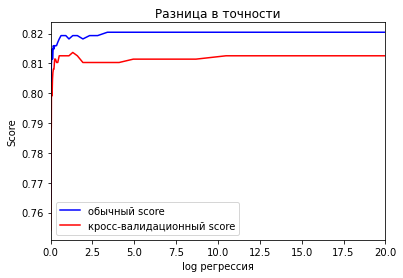

In [63]:
plt.plot(logit_c_var, logit_score, c='blue', label='обычный score')
plt.plot(logit_c_var, logit_cv_score, c='red', label='кросс-валидационный score')
plt.title('Разница в точности')
plt.xlabel('log регрессия')
plt.xlim((0, 20))
plt.ylabel('Score')
plt.legend()

In [64]:
logit_max = pd.DataFrame({'logit': logit_c_var, 'score': logit_score, 
              'cross_val_score': logit_cv_score})['cross_val_score'].max()

### 4.4 Случайный лес

In [65]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
print(f'Обычный score на трейн множестве - {accuracy_score(y_train, RF.predict(X_train))}')
print(f'Кросс-валидационный score на трейн множестве - {cross_val_score(RF, X_train, y_train, cv=skf).mean()}')

Обычный score на трейн множестве - 0.9820426487093153
Кросс-валидационный score на трейн множестве - 0.8080597577051034


In [67]:
RF_max_depth_var = range(1, 30)
RF_score = []
RF_cv_score = []

for m_d in RF_max_depth_var:
    RF = RandomForestClassifier(max_depth=m_d).fit(X_train, y_train)
    RF_score.append(accuracy_score(y_train, RF.predict(X_train)))
    RF_cv_score.append(cross_val_score(RF, X_train, y_train, cv=skf).mean())

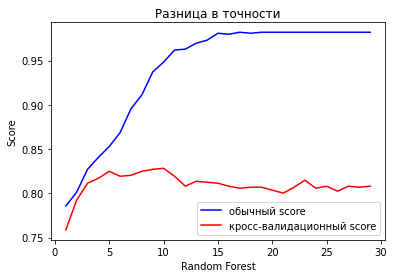

In [68]:
plt.plot(RF_max_depth_var, RF_score, c='blue', label='обычный score')
plt.plot(RF_max_depth_var, RF_cv_score, c='red', label='кросс-валидационный score')
plt.title('Разница в точности')
plt.xlabel('Random Forest')
plt.ylabel('Score')
plt.legend()

In [69]:
RF_max = pd.DataFrame({'RF_m_d': RF_max_depth_var, 'score': RF_score, 
              'cross_val_score': RF_cv_score})['cross_val_score'].max()

### 4.5 GBM

In [70]:
GBM = GradientBoostingClassifier()
GBM.fit(X_train, y_train)

GradientBoostingClassifier()

In [71]:
print(f'Обычный score на трейн множестве - {accuracy_score(y_train, GBM.predict(X_train))}')
print(f'Кросс-валидационный score на трейн множестве - {cross_val_score(GBM, X_train, y_train, cv=skf).mean()}')

Обычный score на трейн множестве - 0.9057239057239057
Кросс-валидационный score на трейн множестве - 0.8204004770573097


In [72]:
GBM_estimators_var = range(10, 200, 2)
GBM_score = []
GBM_cv_score = []

for est in GBM_estimators_var:
    GBM = GradientBoostingClassifier(n_estimators=est).fit(X_train, y_train)
    GBM_score.append(accuracy_score(y_train, GBM.predict(X_train)))
    GBM_cv_score.append(cross_val_score(GBM, X_train, y_train, cv=skf).mean())

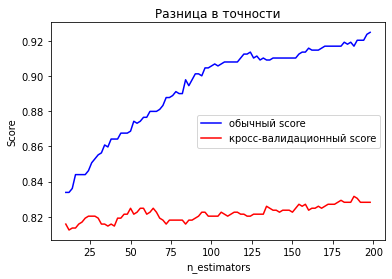

In [73]:
plt.plot(GBM_estimators_var, GBM_score, c='blue', label='обычный score')
plt.plot(GBM_estimators_var, GBM_cv_score, c='red', label='кросс-валидационный score')
plt.title('Разница в точности')
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.legend()

In [74]:
GBM_max = pd.DataFrame({'GBM_est': GBM_estimators_var, 'score': GBM_score, 
              'cross_val_score': GBM_cv_score})['cross_val_score'].max()

In [75]:
print(f'Наилучший кросс-валидационный score на трейн множестве для DecisionTree -     {tree_max}')
print(f'Наилучший кросс-валидационный score на трейн множестве для K-NN -             {knn_max}')
print(f'Наилучший кросс-валидационный score на трейн множестве для LogisticReg -      {logit_max}')
print(f'Наилучший кросс-валидационный score на трейн множестве для RandomForest -     {RF_max}')
print(f'Наилучший кросс-валидационный score на трейн множестве для GradientBoosting - {GBM_max}')

Наилучший кросс-валидационный score на трейн множестве для DecisionTree -     0.8204004770573097
Наилучший кросс-валидационный score на трейн множестве для K-NN -             0.8080534806352395
Наилучший кросс-валидационный score на трейн множестве для LogisticReg -      0.8136589040236017
Наилучший кросс-валидационный score на трейн множестве для RandomForest -     0.8282719226664993
Наилучший кросс-валидационный score на трейн множестве для GradientBoosting - 0.8316489862532169


## 5. Перебор параметров модели

In [76]:
model = RandomForestClassifier(random_state=17)

params = {'n_estimators': range(110, 140), 'max_depth': range(8, 16), 'max_features': range(5, 7), 
             'min_samples_split': range(2, 10), 'min_samples_leaf': range(2, 10)}

In [77]:
skf_1 = StratifiedKFold(n_splits = 10, shuffle=True, random_state=0)

r_search_CV = RandomizedSearchCV(model, param_distributions=params, cv=skf_1)
r_search_CV.fit(X_train, y_train)
best_model = r_search_CV.best_estimator_
best_val_score = cross_val_score(best_model, X_train, y_train, cv = skf_1, scoring = 'accuracy').mean()

print(f'Лучшие параметры - {r_search_CV.best_params_}')
print(f'Score на трейне - {best_model.score(X_train, y_train)}')
print(f'Score на валидации - {best_val_score}')

Лучшие параметры - {'n_estimators': 123, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 5, 'max_depth': 9}
Score на трейне - 0.8731762065095399
Score на валидации - 0.8394756554307117


In [78]:
y_predict = best_model.predict(X_test)

<AxesSubplot:>

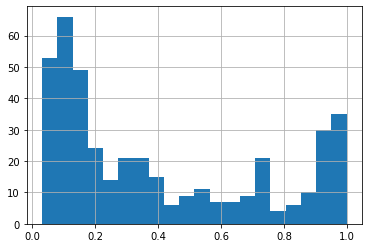

In [79]:
pd.Series(best_model.predict_proba(X_test)[:, 1]).hist(bins=20)

In [80]:
output = pd.DataFrame({'PassengerId': data_test.PassengerId, 
                       'Survived': y_predict})
output = output.astype({'Survived': np.int64})

output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [81]:
output.to_csv(r'C:\Users\User\Desktop\Для задач\Kaggle\Соревнование Титаник\Предсказанное\Предсказания_titanic_RF.csv', 
              index=False)

In [85]:
# по данной модели score в паблике - 0,77511